In [1]:
import torch
import torch.nn as nn
import numpy as np

import matplotlib.pyplot as plt
%matplotlib inline

C:\Users\neupo\AppData\Local\Programs\Python\Python38\lib\site-packages\tqdm\auto.py:22: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [2]:
train_data = np.genfromtxt('nav_robot_train.csv', delimiter=',')
max_0 = 360
max_1 = 250
max_2 = 270
train_data

array([[339.71744091,  98.08159868, 180.        ],
       [200.44954761,  62.96824597,   0.        ],
       [242.43487469, 179.35997324,   0.        ],
       ...,
       [ 89.58780726, 139.00359708, -90.        ],
       [ 86.86364163, 146.21901381, -90.        ],
       [ 94.42697165, 155.46382216, -90.        ]])

In [55]:
x = np.delete(train_data, [1,2], 1)
x = torch.Tensor(x)
# x_max = torch.Tensor([max_0, max_1])
# x = x / x_max
x[:10]

tensor([[339.7174],
        [200.4496],
        [242.4349],
        [138.8141],
        [162.8143],
        [147.7040],
        [114.0832],
        [330.3955],
        [328.7608],
        [293.7106]])

In [56]:
y = np.delete(train_data, [0,1], 1)
y = torch.Tensor(y)
y_max = torch.Tensor([max_2])
y = (y + 90) / y_max
y[:10]

tensor([[1.0000],
        [0.3333],
        [0.3333],
        [0.3333],
        [0.3333],
        [0.3333],
        [0.3333],
        [1.0000],
        [1.0000],
        [1.0000]])

In [59]:
class XOR(nn.Module):
    def __init__(self, input_dim = 1, output_dim=1):
        super(XOR, self).__init__()
        self.linear1 = nn.Linear(input_dim, 4)
        self.linear2 = nn.Linear(4, output_dim)
    
    def forward(self, x):
        z1 = self.linear1(x)
        a1 = torch.sigmoid(z1)
        z2 = self.linear2(a1)
        a2 = z2
        return a2

In [60]:
model = XOR()
mseloss = nn.MSELoss() # mean squared error
# optimizer = torch.optim.SGD(model.parameters(), lr=0.2, momentum=0.0)
optimizer = torch.optim.Adam(model.parameters(), lr=0.03)
N = 100
loss_values = []
accuracy_values = []

for i in range(N):
    model.train()
    y_hat = model.forward(x)
    loss = mseloss(y_hat, y)
    loss.backward()
    optimizer.step()
    optimizer.zero_grad()

    loss_values.append(loss.item())

In [61]:
y_hat = model.forward(x)
loss = mseloss(y_hat, y)
loss.backward()
optimizer.step()
optimizer.zero_grad()
loss_values.append(loss.item())
loss

tensor(0.0992, grad_fn=<MseLossBackward0>)

In [62]:
model.eval()
with torch.no_grad():
    z = model.forward(x)
torch.cat([z,y], 1)

tensor([[0.5428, 1.0000],
        [0.5428, 0.3333],
        [0.5428, 0.3333],
        ...,
        [0.5814, 0.0000],
        [0.5878, 0.0000],
        [0.5721, 0.0000]])

ValueError: x and y must have same first dimension, but have shapes (2,) and (8,)

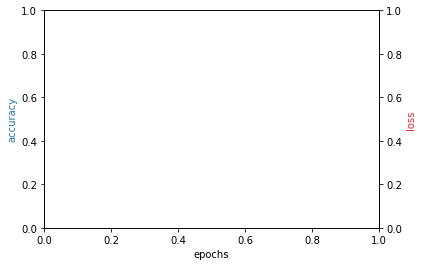

In [30]:
loss = loss_values
# acc = accuracy_values
xdata = np.arange(0, 2, 1)

fig, ax1 = plt.subplots()
ax1.set_xlabel('epochs')
ax1.set_ylabel('accuracy', color='tab:blue')
# ax1.plot(xdata, acc, color='tab:blue')
ax2 = ax1.twinx()
ax2.set_ylabel('loss', color='tab:red')
ax2.plot(xdata, loss, color='tab:red')

In [131]:
with torch.no_grad():
    a = model.forward(torch.Tensor([[0,0],[1,0],[0,1],[1,1]]))
a.round().int()

tensor([[0],
        [1],
        [1],
        [0]], dtype=torch.int32)

In [132]:
x_range = np.linspace(-2, 2, 30)
y_range = np.linspace(-2, 2, 30)
xx, yy = np.meshgrid(x_range, y_range, indexing='ij')
zz = [model.forward(torch.Tensor([[xx[i][j], yy[i,j]] for i in range(30)])).detach().cpu().numpy().flatten() for j in range(30)]
z = np.array(zz)
z

array([[-0.6973953 , -0.6987653 , -0.7003615 , -0.702219  , -0.7043791 ,
        -0.7068887 , -0.7097995 , -0.7131691 , -0.7170613 , -0.7215419 ,
        -0.72667956, -0.7325387 , -0.7391734 , -0.7466123 , -0.75484204,
        -0.7637744 , -0.7732003 , -0.7827184 , -0.7916355 , -0.79881525,
        -0.80248094, -0.79995227, -0.78735185, -0.7593522 , -0.7091527 ,
        -0.6290307 , -0.51192844, -0.3543445 , -0.15995812,  0.05798018],
       [-0.6987784 , -0.7003765 , -0.70223665, -0.7044003 , -0.7069125 ,
        -0.70982695, -0.7132015 , -0.71709776, -0.72158384, -0.726727  ,
        -0.73259234, -0.739233  , -0.74667764, -0.7549119 , -0.76384616,
        -0.7732694 , -0.78277755, -0.79167247, -0.7988117 , -0.8024082 ,
        -0.7997694 , -0.7870004 , -0.75875545, -0.7082174 , -0.6276591 ,
        -0.51004755, -0.35194707, -0.1571486 ,  0.06097901,  0.28098845],
       [-0.700392  , -0.7022543 , -0.7044208 , -0.70693636, -0.7098553 ,
        -0.7132335 , -0.7171347 , -0.72162604, -0

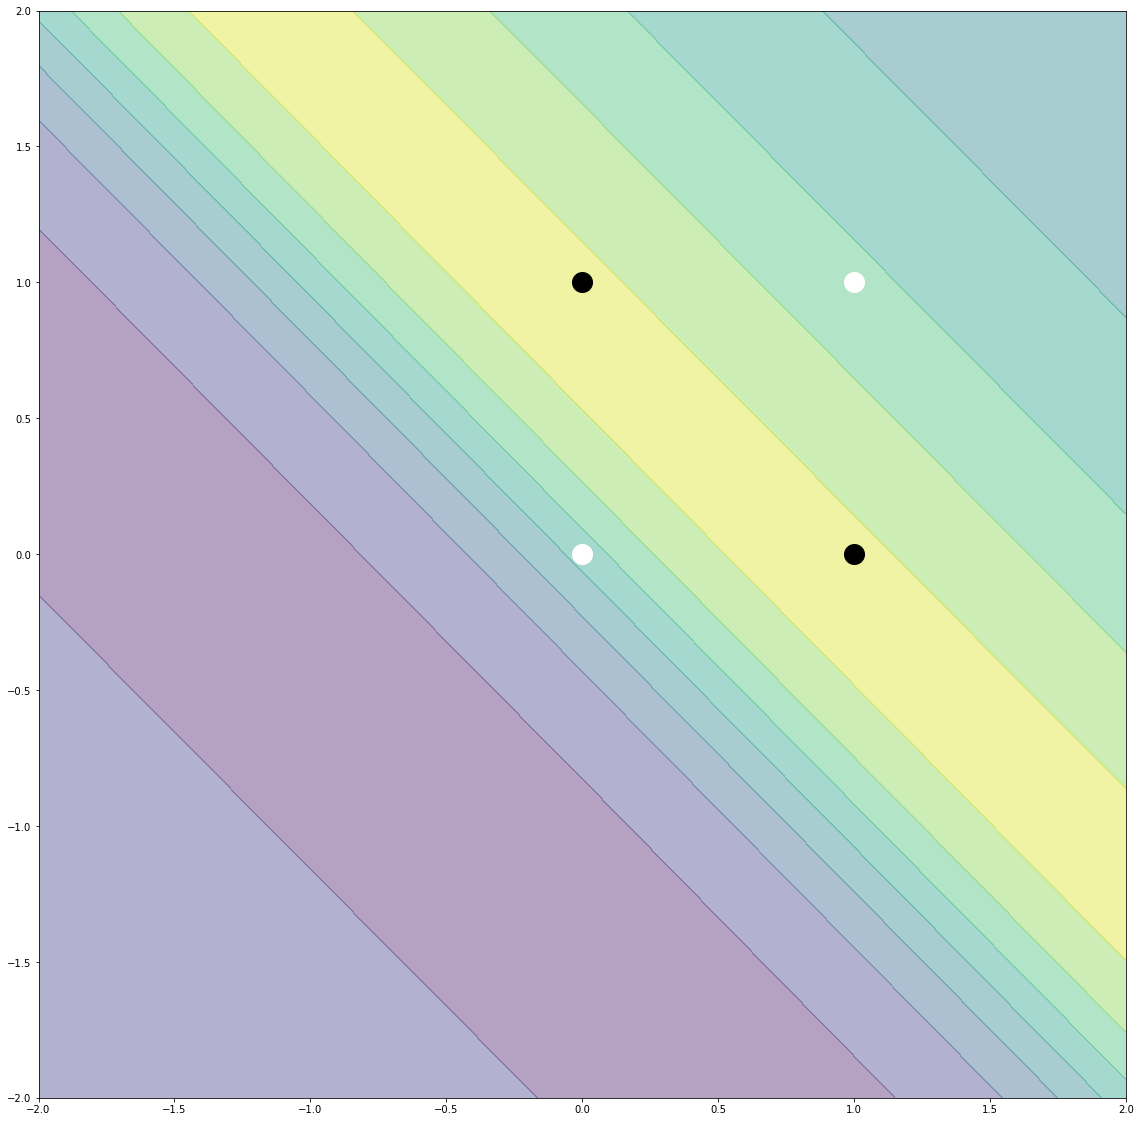

In [133]:
plt.figure(figsize=(20, 20))
plt.axis('scaled')
plt.xlim(-2, 2)
plt.ylim(-2, 2)
colors = {0: "wo", 1: "ko"}
# plotting the four datapoints
for i in range(len(x)):
    plt.plot(x[i][0], x[i][1], colors[int(y[i][0])], markersize=20)

# using the contourf function to create the plot
plt.contourf(xx, yy, z, alpha=0.4)